In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
sns.set(style="whitegrid")

In [4]:
# Small sample dataset(csv for practice)

In [12]:
sample_data = {
    "Area_Sqft": [850, 1200, 1500, 1600, 950, 1100, 3000, 1800, 2200],
    "Bedrooms": [1, 2, 3, 3, 4, 2, 2, 4, 3, ],
    "Bathrooms": [1, 1, 2, 2, 3, 1, 1, 3, 2],
    "Age_Years": [10, 5, 3, 6, 8, 1, 12, 9, 7],
    "Distance_to_City_km": [8.5, 4.2, 5.0, 6.0, 9.0, 8.0, 2.2, 3.5, 4.5],
    "Price_Thousands": [75, 120, 150, 250, 90, 110, 500, 220, 140,]
}

In [13]:
df = pd.DataFrame(sample_data)

In [14]:
df.to_csv("House_price.csv", index=False)


In [17]:
df = pd.read_csv("House_price.csv")

In [18]:
df.head()

,Area_Sqft,Bedrooms,Bathrooms,Age_Years,Distance_to_City_km,Price_Thousands
0,850,1,1,10,8.5,75
1,1200,2,1,5,4.2,120
2,1500,3,2,3,5.0,150
3,1600,3,2,6,6.0,250
4,950,4,3,8,9.0,90


In [19]:
df.shape

(9, 6)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Area_Sqft            9 non-null      int64  
 1   Bedrooms             9 non-null      int64  
 2   Bathrooms            9 non-null      int64  
 3   Age_Years            9 non-null      int64  
 4   Distance_to_City_km  9 non-null      float64
 5   Price_Thousands      9 non-null      int64  
dtypes: float64(1), int64(5)
memory usage: 564.0 bytes


In [23]:
df.describe().round(2)

,Area_Sqft,Bedrooms,Bathrooms,Age_Years,Distance_to_City_km,Price_Thousands
count,9.00,9.00,9.00,9.00,9.00,9.00
mean,1577.78,2.67,1.78,6.78,5.66,183.89
std,685.62,1.00,0.83,3.46,2.38,131.76
min,850.00,1.00,1.00,1.00,2.20,75.00
25%,1100.00,2.00,1.00,5.00,4.20,110.00
50%,1500.00,3.00,2.00,7.00,5.00,140.00
75%,1800.00,3.00,2.00,9.00,8.00,220.00
max,3000.00,4.00,3.00,12.00,9.00,500.00


In [24]:
# visual overview

<Figure size 800x500 with 0 Axes>

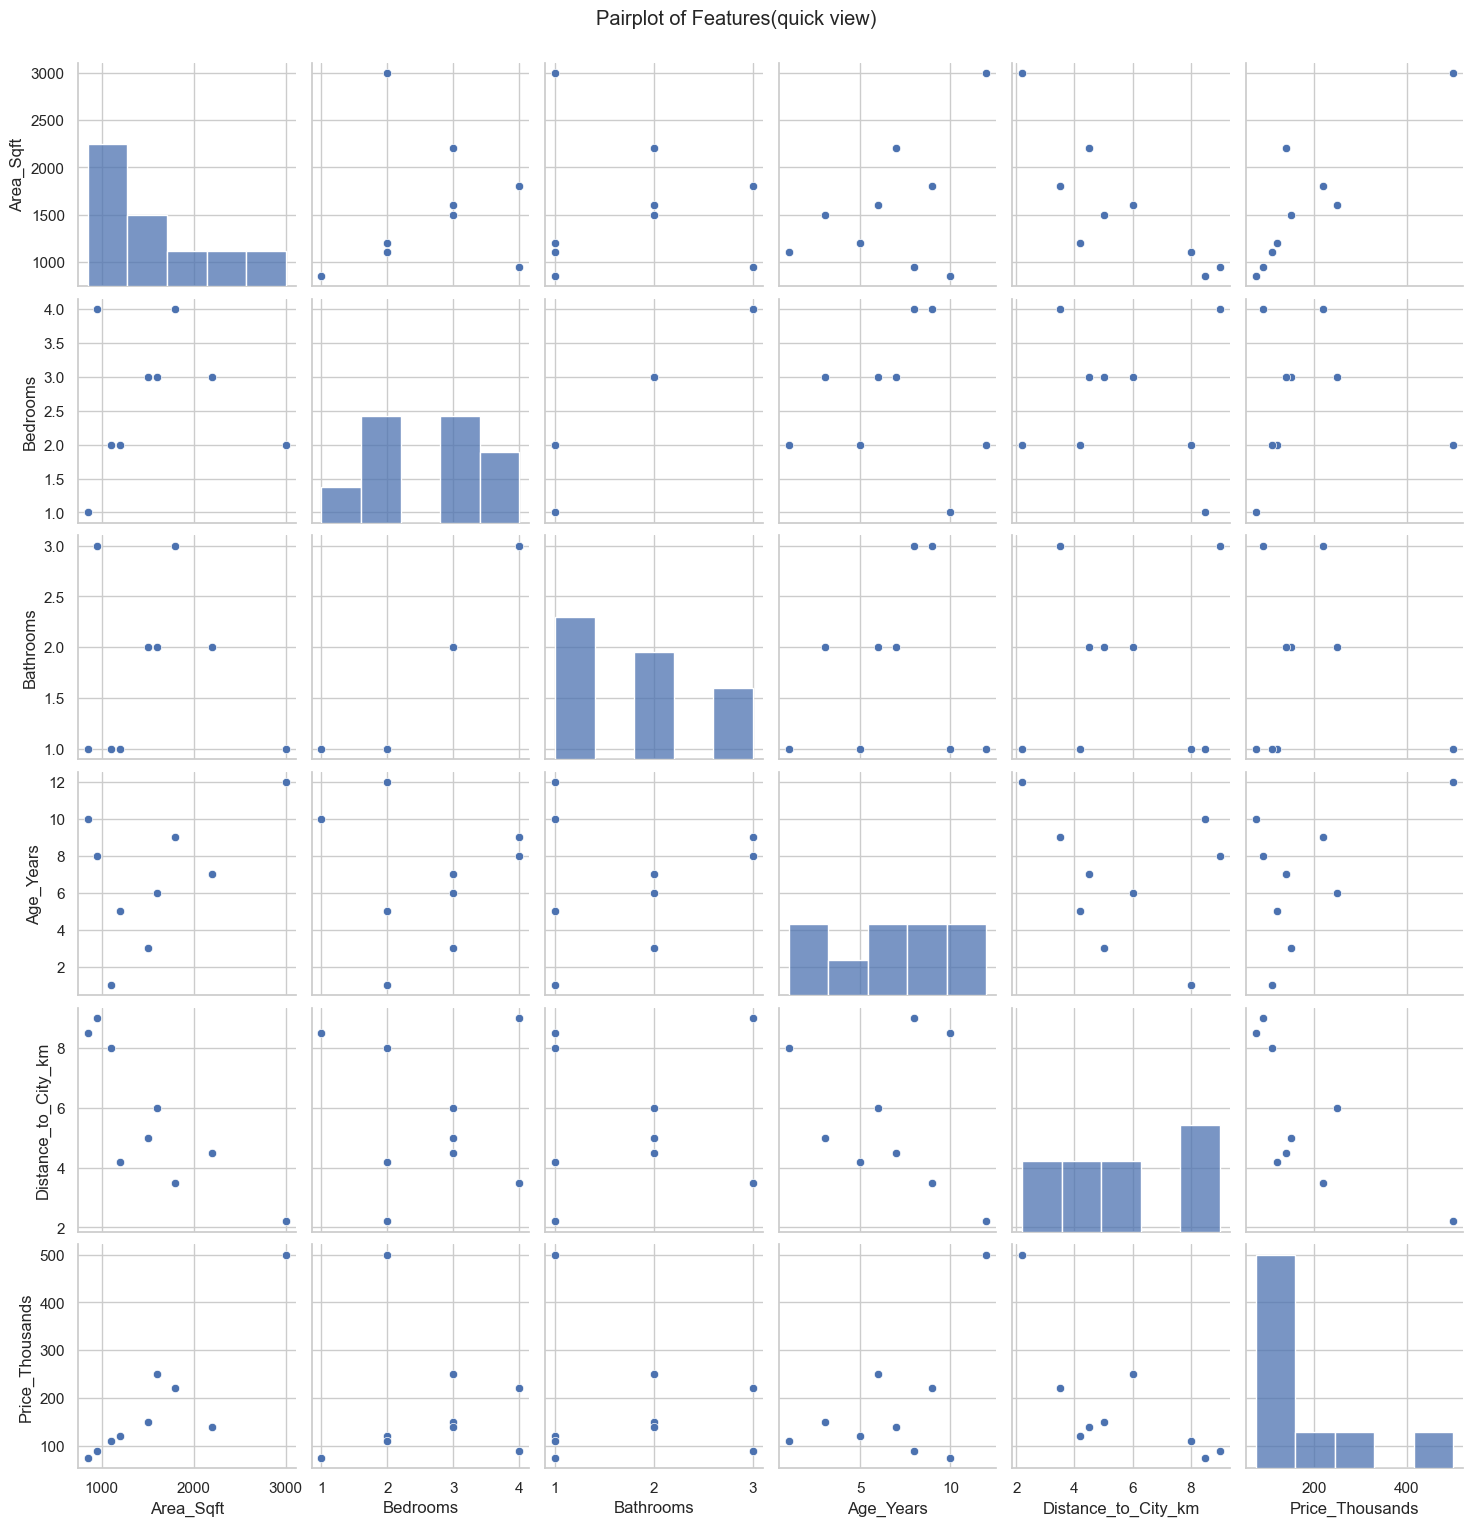

In [27]:
plt.figure(figsize=(8,5))
sns.pairplot(df)
plt.suptitle("Pairplot of Features(quick view)", y=1.02)
plt.show()

In [28]:
# Price per Sqft feature

In [31]:
df["Price_per_sqft"] =df["Price_Thousands"] * 1000 / df["Area_Sqft"]

In [32]:
df["Age_group"] = pd.cut(df["Age_Years"], bins=[-1,5,12,100], labels=["new", "mid", "old"])

In [35]:
print("\nAfter feature engineering(first rows):")


After feature engineering(first rows):


In [36]:
# For models, convert categorical age_group->numeric via get_dummies

In [37]:
df_model = pd.get_dummies(df.drop(columns=["Price_per_sqft"]), columns=["Age_group"], drop_first=1)

In [38]:
x = df_model.drop("Price_Thousands", axis=1)
y = df_model["Price_Thousands"]

In [39]:
# Train / test split

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [41]:
print("\nTrain size:", x_train.shape[0], "Test size:", x_test.shape[0])


Train size: 6 Test size: 3


In [42]:
# Model Linear Regression

In [44]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)
y_pred_lr = linreg.predict(x_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mse_lr ** 0.5
r2_lr = r2_score(y_test, y_pred_lr)

print("RMSE:", rmse_lr)
print("R2 Score:", r2_lr)

RMSE: 1324.906094124947
R2 Score: -710.6389830740903


In [45]:
# Random Forest Regressor (simple)

In [ ]:
rf = RandomForestRegression(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf